### Install Packages

In [1]:

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Tested on Python 3.8.10
!pip install tensorflow==2.12.0
!pip install statsmodels==0.14.0
!pip install numpy==1.23.5
!pip install scikit-learn==1.2.2
!pip install seaborn==0.12.2
!pip install matplotlib==3.7.1
!pip install pandas==2.0.2
!pip install yfinance==0.2.18
!pip install pandas_datareader==0.10.0
!pip install pandas_ta==0.3.14b
!pip install projectpro

    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
### Import Libraries

In [8]:
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import pandas_ta as ta
from projectpro import model_snapshot, checkpoint
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

In [9]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

### TIME SERIES DATA

In [10]:
 dataset = pdr.get_data_yahoo('AAPL', start='2018-01-01', end=datetime.now())
#dataset1 = pdr.get_data_yahoo('GOOG', start='2018-01-01',end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [11]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.524345,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.517288,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.705486,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.168938,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.016018,82271200


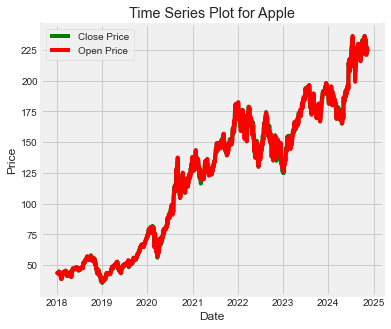

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
#plt.plot(data, label="Sample Data")
plt.subplot(1,2,1)
plt.plot(dataset.index,dataset["Close"],color="green",label="Close Price")

plt.title("Time Series Plot-Google")
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(dataset.index,dataset["Open"],color="red",label="Open Price")
plt.title("Time Series Plot for Apple")
plt.xlabel("Date")
plt.ylabel("Price")

plt.legend()
plt.show()

### Plotting train and test data

In [15]:
tstart = 2018
tend = 2023

In [16]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Apple stock price -High")
    plt.show()

In [18]:
train_test_plot(dataset, tstart,color="green", tend,color="red")

SyntaxError: positional argument follows keyword argument (719871374.py, line 1)

In [7]:
tstart = 2018
tend = 2023

In [8]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "Low"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Apple stock price-Low")
    plt.show()

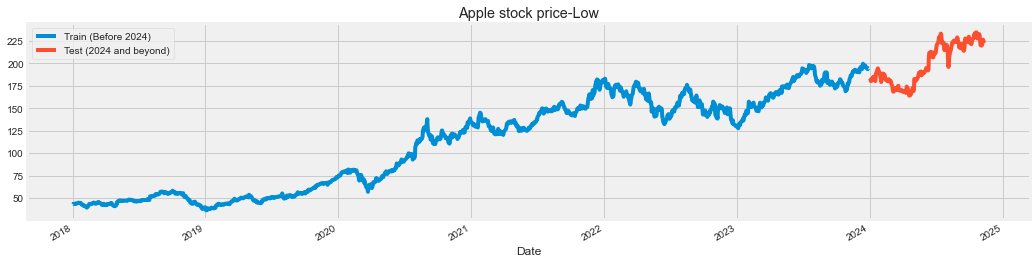

In [9]:
train_test_plot(dataset, tstart, tend,color="green")

### Creating train and test sets

In [12]:
def train_test_split(dataset, tstart, tend, columns = ['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values
    test = dataset.loc[f"{tend+1}":, columns].values
    return train, test

In [13]:
training_set, test_set = train_test_split(dataset, tstart, tend)

### Scaling dataset values

In [14]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

### Creating overlapping batches 

In [12]:
n_steps = 1
features = 1

In [15]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [14]:
X_train, y_train = split_sequence(training_set_scaled, n_steps)

NameError: name 'training_set_scaled' is not defined

### Evaluation

In [1]:
def plot_predictions(test, predicted, title):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')
    plt.legend()
    plt.show()

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))
    return_rmse(test_values, predicted_values)

### Simple RNN

In [26]:
def plot_loss(history):
    plt.figure(figsize = (15,10))
    plt.plot(history.history['loss'], label='loss')
    plt.legend(loc='best')
    plt.show()

In [27]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=125, input_shape=(n_steps, features)))
model_rnn.add(Dense(units=1))

In [28]:
# Compiling the model
model_rnn.compile(optimizer="RMSprop", loss="mse")

In [29]:
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
model_snapshot("34db30")

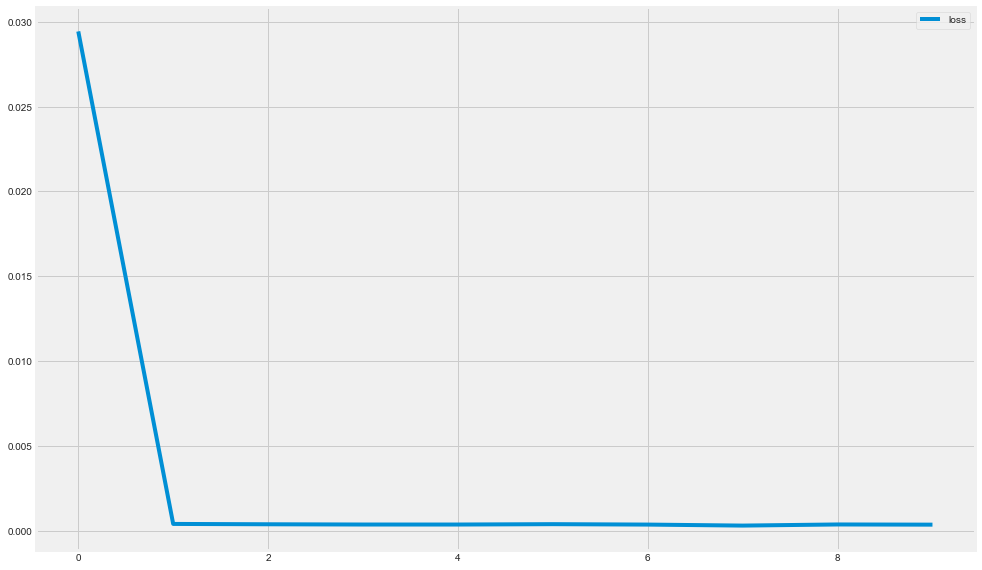

In [30]:
plot_loss(history)

### Time series prediction

In [31]:
# Scaling
inputs = sc.transform(test_set.reshape(-1, 1))

In [32]:
# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(-1, n_steps, features)

In [33]:
# Prediction
predicted_stock_price = model_rnn.predict(X_test)
# Inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 0s 2ms/step


In [10]:
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price-High")

NameError: name 'plot_predictions' is not defined

### Sequence Generation

In [35]:
steps_in_future = 25

In [36]:
def sequence_generation(dataset: pd.DataFrame, sc: MinMaxScaler, model:Sequential, steps_future: int):
    high_dataset = dataset.iloc[len(dataset) - len(test_set) - n_steps:]["High"]
    high_dataset = sc.transform(high_dataset.values.reshape(-1, 1))
    inputs = high_dataset[:n_steps]

    for _ in range(steps_future):
        curr_pred = model.predict(inputs[-n_steps:].reshape(-1, n_steps, features), verbose=0)
        inputs = np.append(inputs, curr_pred, axis=0)

    return sc.inverse_transform(inputs[n_steps:])

In [38]:
results = sequence_generation(dataset, sc, model_rnn, steps_in_future)

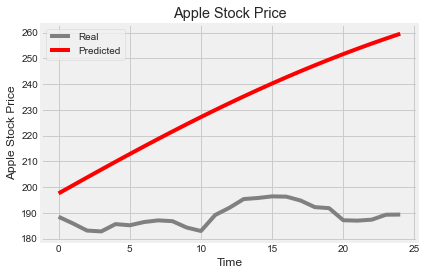

In [39]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

### LSTM

In [40]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))

In [41]:
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [42]:
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

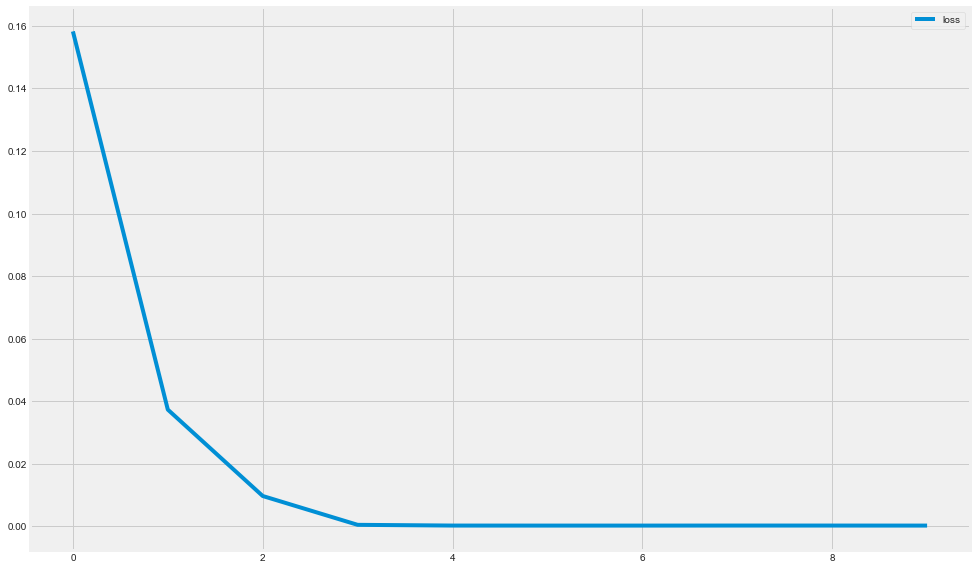

In [43]:
plot_loss(history)

### Time Series Prediction -LSTM

In [44]:
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 1s 2ms/step


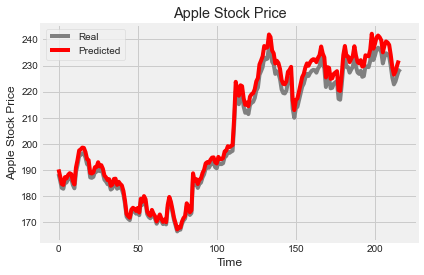

In [45]:
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")

### Sequence Generation -LSTM

In [47]:
results = sequence_generation(dataset, sc, model_lstm, steps_in_future)

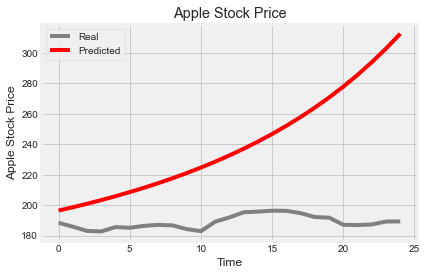

In [48]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

### MULTIVARIATE INPUT

In [53]:
mv_features = 6

In [54]:
multi_variate_df = dataset.copy()

### EXPONENTIAL MOVING AVERAGE

In [55]:
multi_variate_df['RSI'] = ta.rsi(multi_variate_df.Close, length=15)
multi_variate_df['EMAF'] = ta.ema(multi_variate_df.Close, length=20)
multi_variate_df['EMAM'] = ta.ema(multi_variate_df.Close, length=100)
multi_variate_df['EMAS'] = ta.ema(multi_variate_df.Close, length=150)

In [56]:
multi_variate_df['Target'] = multi_variate_df['Adj Close'] - dataset.Open
multi_variate_df['Target'] = multi_variate_df['Target'].shift(-1)
multi_variate_df.dropna(inplace=True)
multi_variate_df.drop(['Volume', 'Close'], axis=1, inplace=True)

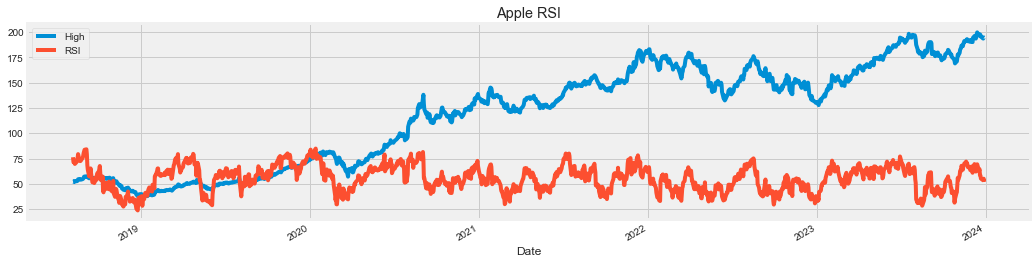

In [57]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'RSI']].plot(figsize=(16, 4), legend=True)
plt.title("Apple RSI")
plt.show()

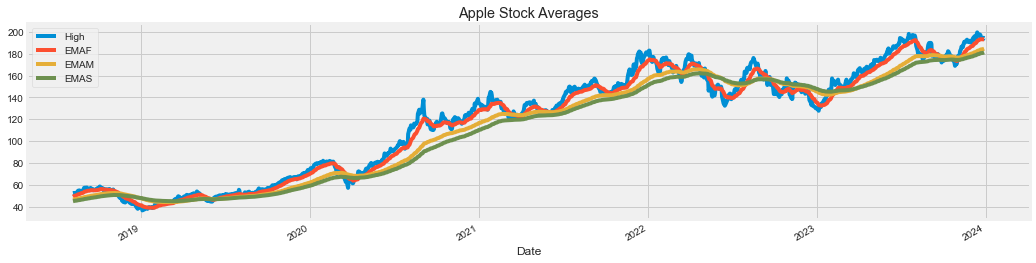

In [58]:
multi_variate_df.loc[f"{tstart}":f"{tend}", ['High', 'EMAF', 'EMAM', 'EMAS']].plot(figsize=(16, 4), legend=True)
plt.title("Apple Stock Averages")
plt.show()

In [68]:
feat_columns = ['Open', 'High', 'RSI', 'EMAF', 'EMAM', 'EMAS']
label_col = ['Target']

### SPLITTING TRAIN AND TEST DATA

In [3]:
from sklearn.preprocessing import MinMaxScaler
mv_training_set, mv_test_set = train_test_split(multi_variate_df, tstart, tend, feat_columns + label_col)

NameError: name 'train_test_split' is not defined

In [4]:
X_train = mv_training_set[:, :-1]
y_train = mv_training_set[:, -1]

X_test = mv_test_set[:, :-1]
y_test = mv_test_set[:, -1]

NameError: name 'mv_training_set' is not defined

In [71]:
mv_sc = MinMaxScaler(feature_range=(0, 1))
X_train = mv_sc.fit_transform(X_train).reshape(-1, 1, mv_features)
X_test = mv_sc.transform(X_test).reshape(-1, 1, mv_features)

### MODEL

In [72]:
model_mv = Sequential()
model_mv.add(LSTM(units=125, input_shape=(1, mv_features)))
model_mv.add(Dense(units=1))
# Compiling the model
model_mv.compile(optimizer="RMSprop", loss="mse")

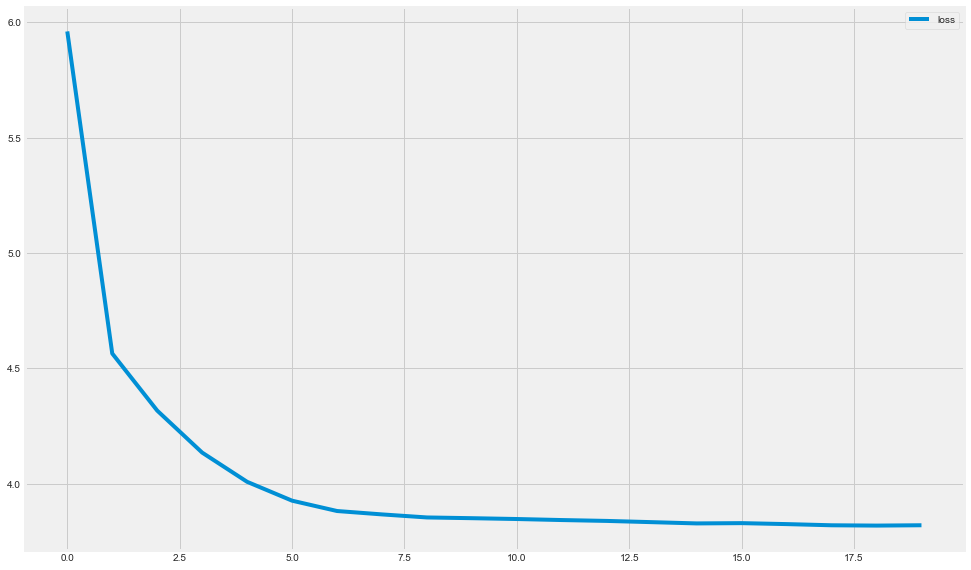

In [73]:
history = model_mv.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
model_snapshot("34db30")
plot_loss(history)

In [2]:
predictions = model_mv.predict(X_test)
plot_predictions(y_test, predictions, "Apple Stock Price")

NameError: name 'model_mv' is not defined

In [75]:

dataset1 = pdr.get_data_yahoo('GOOG', start='2018-01-01',end=datetime.now())
dataset1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.119549,24752000
2018-01-03,53.215500,54.314499,53.160500,54.124001,53.991409,28604000
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.186924,20092000
2018-01-05,54.700001,55.212502,54.599998,55.111500,54.976486,25582000
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.211411,20952000


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



dataset.head()
dataset['10_day_MA'] = dataset['Close'].rolling(window=10).mean()  # Example feature: 10-day moving average
dataset = dataset.dropna()  # Drop any rows with NaN values from moving averages

# Define features and target
X = dataset[['Close', 'Volume', '10_day_MA']]  # Example features
y = dataset['Close'].shift(-1)  # Target: Next day's closing price
X = X[:-1]
y = y[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Compare actual vs. predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())
# Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()



NameError: name 'dataset' is not defined